#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Read Data

In [ ]:
df = pd.read_csv('train-perceptron.txt', sep=' ', header=None)
df

,0,1,2
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [ ]:
c1 = df[ df[2] == 1]
c2 = df[ df[2] == 2]

In [ ]:
c1

,0,1,2
0,1,1.0,1
1,1,-1.0,1
5,4,5.0,1


In [ ]:
c2

,0,1,2
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2


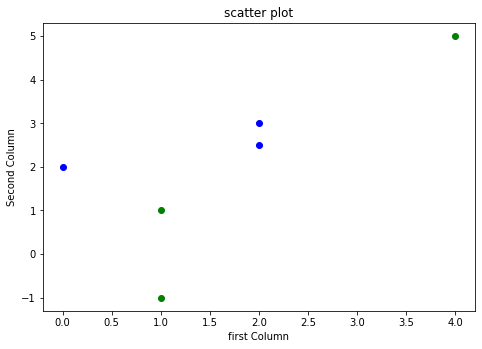

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(c1[0], c1[1], color='g')
ax.scatter(c2[0], c2[1] , color='b')
ax.set_xlabel('first Column')
ax.set_ylabel('Second Column')
ax.set_title('scatter plot')
plt.show()

#Converting to higher dimension and normalization

In [ ]:
for i in df.index:
     print(df[0][i], df[1][i], df[2][i])

1 1.0 1
1 -1.0 1
2 2.5 2
0 2.0 2
2 3.0 2
4 5.0 1


In [ ]:
#for i in df.index:
#     print(df[0][i], df[1][i], df[2][i])

lst = []

for i in df.index:
  lst.append( [df[0][i]**2, df[1][i]**2, df[0][i]*df[1][i], df[0][i], df[1][i], 1])     

for i in lst:
  print(i)

#Normalizing

for i in df.index:
  if df[2][i] == 2:
    for j in range(0,6,1):
      lst[i][j] = lst[i][j]*-1

print('\n\n')
for i in lst:
  print(i)

[1, 1.0, 1.0, 1, 1.0, 1]
[1, 1.0, -1.0, 1, -1.0, 1]
[4, 6.25, 5.0, 2, 2.5, 1]
[0, 4.0, 0.0, 0, 2.0, 1]
[4, 9.0, 6.0, 2, 3.0, 1]
[16, 25.0, 20.0, 4, 5.0, 1]



[1, 1.0, 1.0, 1, 1.0, 1]
[1, 1.0, -1.0, 1, -1.0, 1]
[-4, -6.25, -5.0, -2, -2.5, -1]
[0, -4.0, -0.0, 0, -2.0, -1]
[-4, -9.0, -6.0, -2, -3.0, -1]
[16, 25.0, 20.0, 4, 5.0, 1]


In [ ]:
arr = np.array(lst, dtype=np.float64)
print(arr)
print(arr.shape)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [ 0.   -4.   -0.    0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]
 [16.   25.   20.    4.    5.    1.  ]]
(6, 6)


# One at a time

##zero

In [ ]:
one_at_a_time_zero = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [0,0,0,0,0,0]
  
  count = 0
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:    
        w = w + lr*x         
      else:
        #print('correct')
        correct = correct - 1
      
    count = count + 1
    if correct == 0:
      #print(value)
      
      break
  one_at_a_time_zero.append(count)

  print(count)

141
141
141
141
141
141
141
141
141
141


##One

In [ ]:
one_at_a_time_one = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [1,1,1,1,1,1]
  
  count = 0
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:    
        w = w + lr*x         
      else:
        #print('correct')
        correct = correct - 1
      
    count = count + 1
    if correct == 0:
      #print(value)
      break
  one_at_a_time_one.append(count)

  print(count)

6
147
149
149
141
157
136
136
140
141


## Random

In [ ]:
import random

random.seed(5)
one_at_a_time_random = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [random.random() ,random.random() ,random.random() ,random.random() ,random.random(),random.random()]
  
  count = 0
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:    
        w = w + lr*x         
      else:
        #print('correct')
        correct = correct - 1
      
    count = count + 1
    if correct == 0:
      #print(value)
      break
  one_at_a_time_random.append(count)
  print(count)
  


136
156
149
158
157
153
140
136
135
136


# Many at a time

##Zero

In [ ]:
many_at_a_time_zero = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [0,0,0,0,0,0]
  
  count = 0
  temp_add = np.zeros(6)
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:    
        temp_add = temp_add + x        
      else:
        #print('correct')
        correct = correct - 1
      
    count = count + 1
    if correct == 0:
      #print(value)
      break
    else:
      w = w + (lr * temp_add)
  
  many_at_a_time_zero.append(count)

##One

In [ ]:
many_at_a_time_one = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [1,1,1,1,1,1]
  
  count = 0
  temp_add = np.zeros(6)
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:    
        temp_add = temp_add + x        
      else:
        #print('correct')
        correct = correct - 1
      
    count = count + 1
    if correct == 0:
      #print(value)
      break
    else:
      w = w + (lr * temp_add)
  many_at_a_time_one.append(count)

##Random

In [ ]:
many_at_a_time_random = []
learning_rate = []
random.seed(5)

for j in range(1,11,1):
  lr = float(j/10)
  learning_rate.append(lr)
  w = [random.random() ,random.random() ,random.random() ,random.random() ,random.random(),random.random()]
  
  count = 0
  temp_add = np.zeros(6)
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:    
        temp_add = temp_add + x        
      else:
        #print('correct')
        correct = correct - 1
      
    count = count + 1
    if correct == 0:
      #print(value)
      break
    else:
      w = w + (lr * temp_add)
  many_at_a_time_random.append(count)

#Tables & Graphs

In [ ]:
initial_w_all_one = pd.DataFrame(
    {
        'Learning Rate': learning_rate,
      'One at a time': one_at_a_time_one,
     'Many At a time': many_at_a_time_one,
    })
initial_w_all_one

,Learning Rate,One at a time,Many At a time
0,0.1,6,84
1,0.2,147,68
2,0.3,149,92
3,0.4,149,94
4,0.5,141,74
5,0.6,157,73
6,0.7,136,73
7,0.8,136,67
8,0.9,140,67
9,1.0,141,67


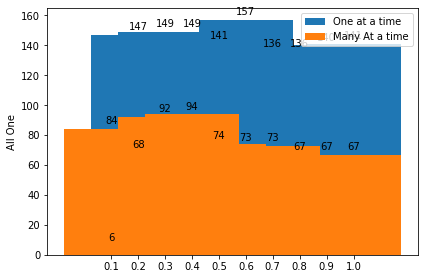

In [ ]:
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(np.array(learning_rate), one_at_a_time_one, width, label='One at a time')
rects2 = ax.bar(np.array(learning_rate), many_at_a_time_one, width, label='Many At a time')
ax.set_ylabel('All One')
ax.set_xticks(np.array(learning_rate))
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
initial_w_all_zero = pd.DataFrame(
    {
        'Learning Rate': learning_rate,
      'One at a time': one_at_a_time_zero,
     'Many At a time': many_at_a_time_zero,
    })
initial_w_all_zero

,Learning Rate,One at a time,Many At a time
0,0.1,141,61
1,0.2,141,61
2,0.3,141,61
3,0.4,141,61
4,0.5,141,61
5,0.6,141,61
6,0.7,141,61
7,0.8,141,61
8,0.9,141,61
9,1.0,141,61


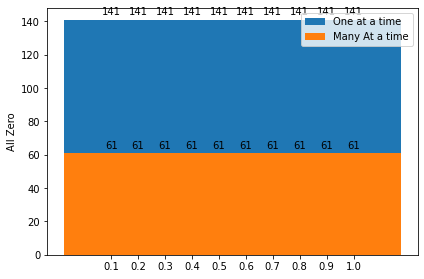

In [ ]:
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(np.array(learning_rate), one_at_a_time_zero, width, label='One at a time')
rects2 = ax.bar(np.array(learning_rate), many_at_a_time_zero, width, label='Many At a time')
ax.set_ylabel('All Zero')
ax.set_xticks(np.array(learning_rate))
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
initial_w_all_random = pd.DataFrame(
    {
        'Learning Rate': learning_rate,
      'One at a time': one_at_a_time_random,
     'Many At a time': many_at_a_time_random,
    })
initial_w_all_random

,Learning Rate,One at a time,Many At a time
0,0.1,136,76
1,0.2,156,75
2,0.3,149,73
3,0.4,158,63
4,0.5,157,72
5,0.6,153,73
6,0.7,140,67
7,0.8,136,74
8,0.9,135,74
9,1.0,136,67


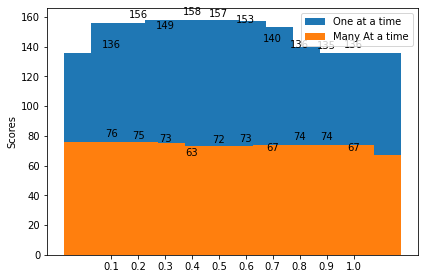

In [ ]:
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(np.array(learning_rate), one_at_a_time_random, width, label='One at a time')
rects2 = ax.bar(np.array(learning_rate), many_at_a_time_random, width, label='Many At a time')
ax.set_ylabel('Scores')
ax.set_xticks(np.array(learning_rate))
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()